In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('D:/EDA-Collection\Retail Sales Data with Seasonal Trends & Marketing/Retail_sales.csv')

In [3]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [5]:
df.shape

(30000, 11)

In [6]:
df.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

In [7]:
df.describe()

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,2.973833,49.944033
std,2.779759e+07,3.323929,2568.639288,5.974530,64.401655
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store ID               30000 non-null  object        
 1   Product ID             30000 non-null  int64         
 2   Date                   30000 non-null  datetime64[ns]
 3   Units Sold             30000 non-null  int64         
 4   Sales Revenue (USD)    30000 non-null  float64       
 5   Discount Percentage    30000 non-null  int64         
 6   Marketing Spend (USD)  30000 non-null  int64         
 7   Store Location         30000 non-null  object        
 8   Product Category       30000 non-null  object        
 9   Day of the Week        30000 non-null  object        
 10  Holiday Effect         30000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.3+ MB


In [10]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [11]:
df['Product Category'].unique()

array(['Furniture', 'Electronics', 'Groceries', 'Clothing'], dtype=object)

In [12]:
df['Discount Percentage'].unique()

array([20,  0, 15, 10,  5], dtype=int64)

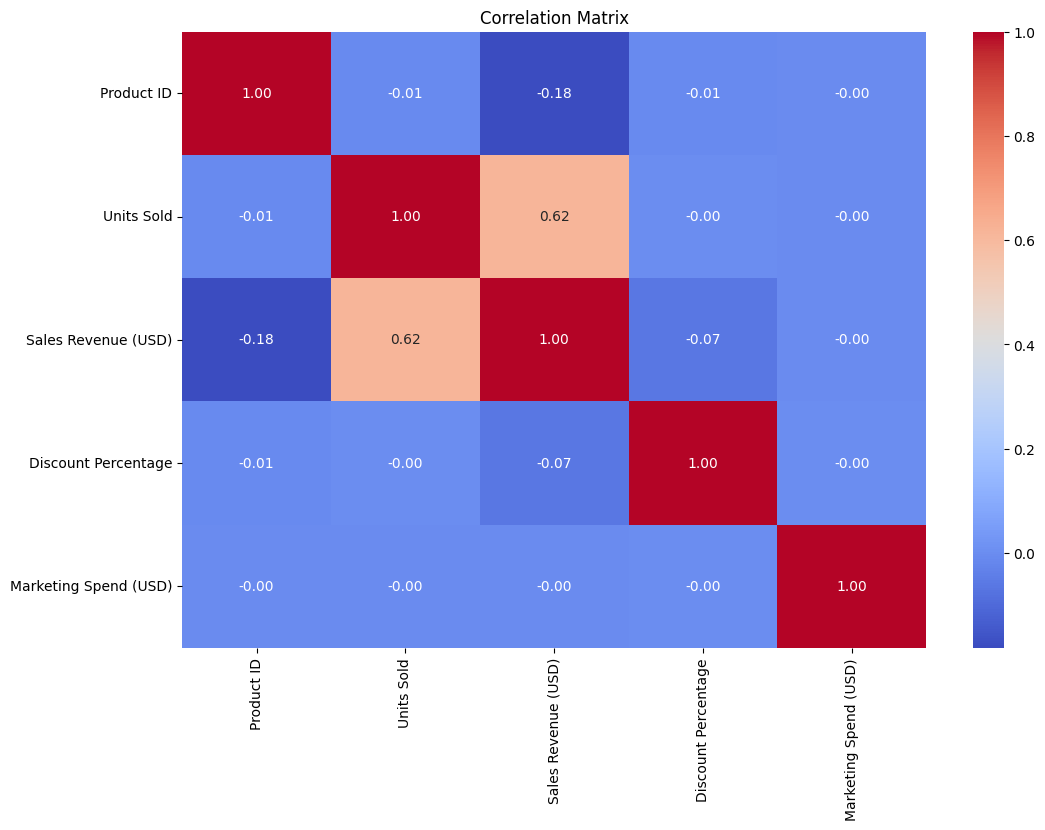

In [13]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store ID               30000 non-null  object        
 1   Product ID             30000 non-null  int64         
 2   Date                   30000 non-null  datetime64[ns]
 3   Units Sold             30000 non-null  int64         
 4   Sales Revenue (USD)    30000 non-null  float64       
 5   Discount Percentage    30000 non-null  int64         
 6   Marketing Spend (USD)  30000 non-null  int64         
 7   Store Location         30000 non-null  object        
 8   Product Category       30000 non-null  object        
 9   Day of the Week        30000 non-null  object        
 10  Holiday Effect         30000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.3+ MB


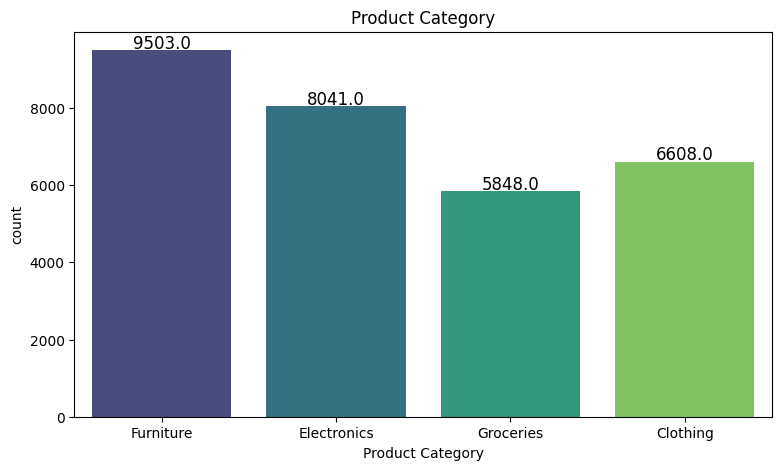

In [15]:
plt.figure(figsize=(9, 5))
ax=sns.countplot(x='Product Category',data=df,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Product Category')
plt.show()

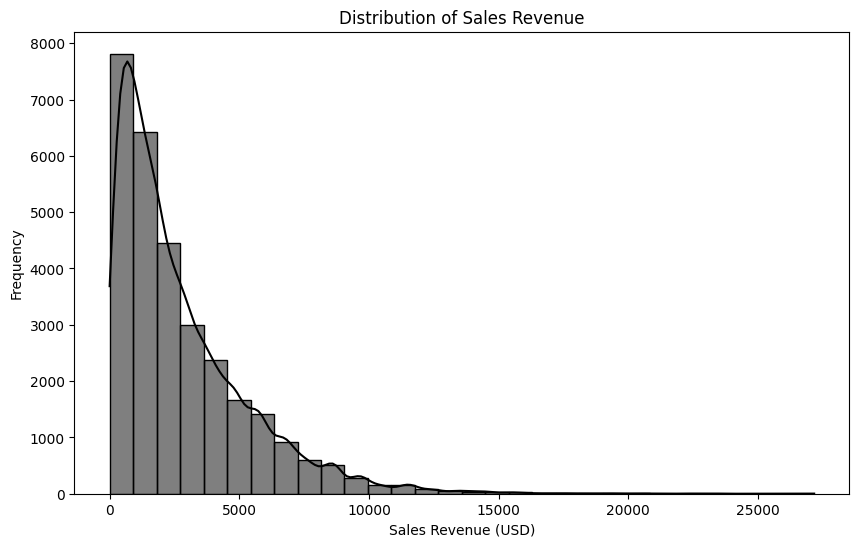

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Revenue (USD)'],color='black', kde=True, bins=30)
plt.title('Distribution of Sales Revenue')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

In [17]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [18]:
df['Product Category'] = df['Product Category'].astype('category')

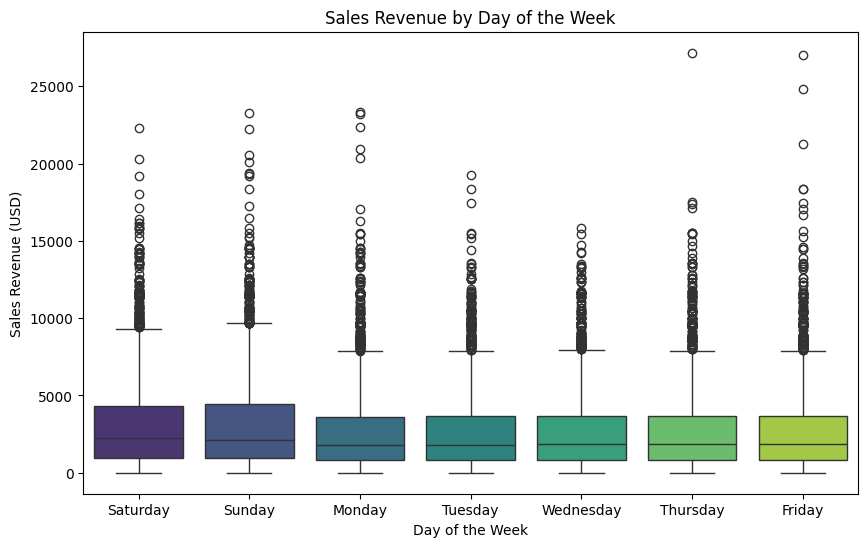

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of the Week', y='Sales Revenue (USD)', data=df,palette='viridis')

plt.title('Sales Revenue by Day of the Week')
plt.show()

In [20]:
df = pd.get_dummies(df, columns=['Store ID', 'Store Location', 'Product Category', 'Day of the Week'], drop_first=True)

In [21]:
X = df.drop(columns=['Sales Revenue (USD)', 'Date'])
y = df['Sales Revenue (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# `Model`

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 22.175967400002207
Mean Squared Error (MSE): 41602.15364274277
Root Mean Squared Error (RMSE): 203.966060026522
R-squared (R2): 0.9938004330051915


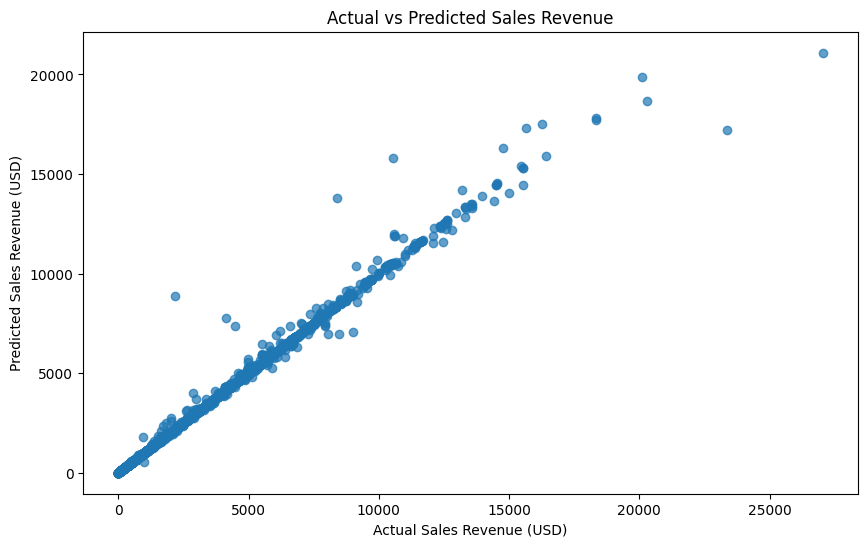

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Predicted Sales Revenue (USD)')
plt.title('Actual vs Predicted Sales Revenue')
plt.show()

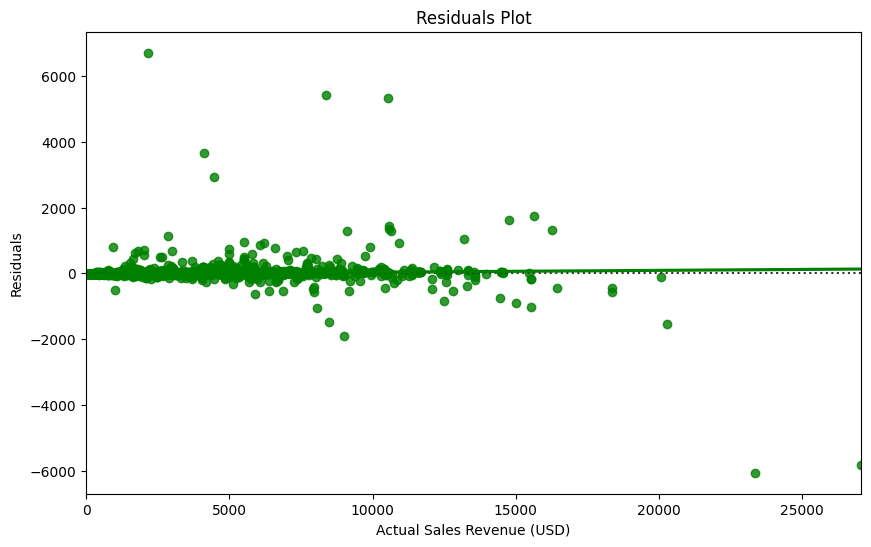

In [24]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()